# Random Forest Regresso

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    seed = 7
    np.random.seed(seed)
    train, validation = train_test_split(train, test_size=0.2, random_state=seed)    
    return train,validation 

In [3]:
train , validation = get_data()
train_target = train.Servidas
train.drop(['Servidas'],axis = 1 , inplace = True)
validation_target=validation.Servidas
validation.drop(['Servidas'],axis = 1 , inplace = True)

In [4]:
model1 = RandomForestRegressor()
model1.fit(train,train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [5]:
predict1 = model1.predict(validation)
print('Decision Tree Regressor MAE = ', mean_absolute_error(validation_target , predict1))
print('Decision Tree Regressor R2 = ', r2_score(validation_target , predict1))

Decision Tree Regressor MAE =  500.818294574
Decision Tree Regressor R2 =  0.914248787156


In [6]:
rng = np.random.RandomState(1)
model2 = AdaBoostRegressor(RandomForestRegressor(),
                          n_estimators=300, random_state=rng)
model2.fit(train, train_target)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x7f0ad349f558>)

In [7]:
predict2 = model2.predict(validation)
print('Decision Tree Regressor MAE = ', mean_absolute_error(validation_target , predict2))
print('Decision Tree Regressor R2 = ', r2_score(validation_target , predict2))

Decision Tree Regressor MAE =  499.863410853
Decision Tree Regressor R2 =  0.915286468536


In [8]:
# Plot the results
validation_=validation.values[100:110,:]
validation_target_=validation_target.values.reshape((validation_target.shape[0],1))[100:110,:]
predict1_=predict1.reshape((predict1.shape[0],1))[100:110,:]
predict2_=predict2.reshape((predict2.shape[0],1))[100:110,:]
validation_reduced = PCA(n_components=1).fit_transform(validation_)

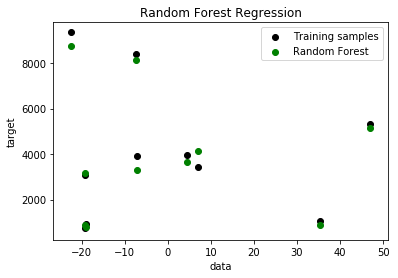

In [9]:
# A imagem mostra os dados verdadeiros em preto e em verde aqueles encontrados pela árvore de decisão
plt.figure()
plt.scatter(validation_reduced, validation_target_, c="k", label="Training samples")
plt.scatter(validation_reduced,predict1_ , c="g", label="Random Forest")
#plt.scatter(validation_reduced, predict2_, c="r", label="n_estimators=300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

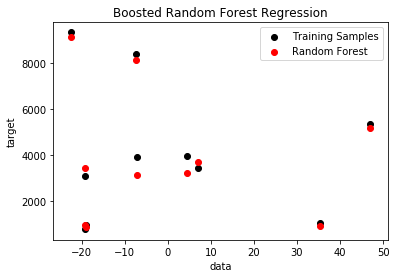

In [10]:
# A imagem mostra os dados verdadeiros em preto e em vermelho aqueles encontrados pela árvore de decisão con ada boost
plt.figure()
plt.scatter(validation_reduced, validation_target_, c="k", label="Training Samples")
#plt.scatter(validation_reduced,predict1_ , c="g", label="Decision Tree")
plt.scatter(validation_reduced, predict2_, c="r", label="Random Forest")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Random Forest Regression")
plt.legend()
plt.show()

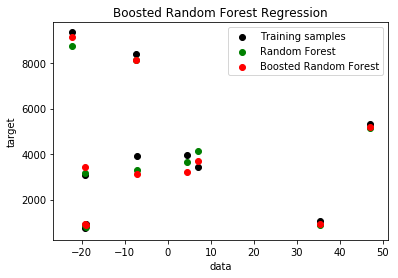

In [11]:
# A imagem mostra os dados verdadeiros em preto e em verde aqueles encontrados pela árvore de decisão e 
# em vermelho aqueles encontrados pela árvore de decisão com ada boost, se pode ver que ada boost foi melhor
plt.figure()
plt.scatter(validation_reduced, validation_target_, c="k", label="Training samples")
plt.scatter(validation_reduced,predict1_ , c="g", label="Random Forest")
plt.scatter(validation_reduced, predict2_, c="r", label="Boosted Random Forest")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Random Forest Regression")
plt.legend()
plt.show()